#**Trying To implement some of examples and exercises in  Pytorch"**

In [ ]:
import os
import torch
import torchvision as vis
# Preprocess a test image
import PIL as pil
import requests
from io import BytesIO
import numpy as np


#**Tensors**
Tensors are the PyTorch equivalent to Numpy arrays. A vector is a 1-D tensor, and a matrix a 2-D tensor. When working with neural networks, we will use tensors of various shapes and number of dimensions.

# **torch.zeros: Creates a tensor filled with zeros**
# **torch.ones: Creates a tensor filled with ones**
# **torch.rand: Creates a tensor with random values uniformly sampled between 0 and 1**
# **torch.randn: Creates a tensor with random values sampled from a normal distribution with mean 0 and variance 1**
# **torch.arange: Creates a tensor containing the values  N,N+1,N+2,...,M**
# **torch.Tensor (input list): Creates a tensor from the list elements you provide**

In [ ]:
x = torch.Tensor(2, 3, 4)
print(x)

tensor([[[-1.6227e-06,  3.0843e-41,  7.0065e-44,  7.0065e-44],
         [ 6.3058e-44,  6.7262e-44,  7.2868e-44,  6.3058e-44],
         [ 7.0065e-44,  7.1466e-44,  1.1771e-43,  6.8664e-44]],

        [[ 7.7071e-44,  8.1275e-44,  6.7262e-44,  7.7071e-44],
         [ 8.1275e-44,  7.0065e-44,  7.8473e-44,  6.4460e-44],
         [ 7.4269e-44,  7.4269e-44,  7.0065e-44,  7.8473e-44]]])


In [ ]:
# Create a tensor from a (nested) list
x = torch.Tensor([[1, 2], [3, 4]])
print(x)

tensor([[1., 2.],
        [3., 4.]])


In [ ]:
# Create a tensor with random values between 0 and 1 with the shape [3, 4, 6]
x = torch.rand(3, 4, 6)
print(x)

tensor([[[0.5469, 0.1932, 0.6664, 0.4418, 0.5757, 0.2629],
         [0.2622, 0.4381, 0.7422, 0.3966, 0.4942, 0.5017],
         [0.3985, 0.8600, 0.0126, 0.3844, 0.2495, 0.8546],
         [0.1626, 0.9663, 0.2404, 0.5143, 0.2196, 0.3665]],

        [[0.0854, 0.7819, 0.1891, 0.9807, 0.0135, 0.0014],
         [0.1223, 0.9262, 0.4104, 0.3302, 0.9575, 0.4392],
         [0.2122, 0.1617, 0.2168, 0.3710, 0.8529, 0.7073],
         [0.0209, 0.7008, 0.0020, 0.3010, 0.9063, 0.6714]],

        [[0.2497, 0.1207, 0.4985, 0.3026, 0.6497, 0.9298],
         [0.1733, 0.2446, 0.7593, 0.4220, 0.5152, 0.8118],
         [0.4927, 0.1619, 0.6728, 0.5408, 0.3587, 0.6881],
         [0.4702, 0.7062, 0.6994, 0.0019, 0.3231, 0.9097]]])


# **obtain the shape of a tensor in the same way as in numpy (x.shape), or using the .size method**

In [ ]:
shape = x.shape
print("Shape:", x.shape)

size = x.size()
print("Size:", size)

dim1, dim2, dim3 = x.size()
print("Size:", dim1, dim2, dim3)

Shape: torch.Size([3, 4, 6])
Size: torch.Size([3, 4, 6])
Size: 3 4 6


# **Converting Tensor to Numpy, and Numpy to Tensor**

# **To transform a numpy array into a tensor, we can use the function torch.from_numpy:**

In [ ]:
np_arr = np.array([[1, 2], [3, 4]])
tensor = torch.from_numpy(np_arr)

print("Numpy array:", np_arr)
print("PyTorch tensor:", tensor)

Numpy array: [[1 2]
 [3 4]]
PyTorch tensor: tensor([[1, 2],
        [3, 4]])


# **To transform a PyTorch tensor back to a numpy array, we can use the function .numpy() on tensors:**

In [ ]:
tensor = torch.arange(4)
np_arr = tensor.numpy()

print("PyTorch tensor:", tensor)
print("Numpy array:", np_arr)

PyTorch tensor: tensor([0, 1, 2, 3])
Numpy array: [0 1 2 3]


# **Operations by Pytorch**

# **Add two tensors**

In [ ]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
y = x1 + x2

print("X1", x1)
print("X2", x2)
print("Y", y)

X1 tensor([[0.1583, 0.0745, 0.7116],
        [0.5840, 0.3115, 0.2261]])
X2 tensor([[0.0733, 0.0228, 0.2007],
        [0.0135, 0.2377, 0.5282]])
Y tensor([[0.2316, 0.0972, 0.9123],
        [0.5974, 0.5492, 0.7543]])


In [ ]:
x2.add_(x1)
print("X1 (after)", x1)
print("X2 (after)", x2)

X1 (after) tensor([[0.1583, 0.0745, 0.7116],
        [0.5840, 0.3115, 0.2261]])
X2 (after) tensor([[0.2316, 0.0972, 0.9123],
        [0.5974, 0.5492, 0.7543]])


# **Changing the shape of a tensor-In PyTorch, this operation is called view**

In [ ]:
x = torch.arange(10)
print("X", x)

X tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [ ]:
x = x.view(2, 5)
print("X", x)

X tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])


In [ ]:
x = x.permute(1, 0) # Swapping dimension 0 and 1
print("X", x)

X tensor([[0, 5],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9]])


# **torch.matmul: Performs the matrix product over two tensors, where the specific behavior depends on the dimensions. If both inputs are matrices (2-dimensional tensors), it performs the standard matrix product. For higher dimensional inputs, the function supports broadcasting. Can also be written as a @ b, similar to numpy.**
#**torch.mm: Performs the matrix product over two matrices, but doesn't support broadcasting**
#**torch.bmm: Performs the matrix product with a support batch dimension. If the first tensor  T  is of shape ( b×n×m ), and the second tensor  R  ( b×m×p ), the output  O  is of shape ( b×n×p ), and has been calculated by performing  b  matrix multiplications of the submatrices of  T  and  R :  Oi=Ti@Ri**
#**torch.einsum: Performs matrix multiplications and more (i.e. sums of products) using the Einstein summation convention.** 

In [ ]:
x = torch.arange(10)
x = x.view(2, 5)
print("X", x)

X tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])


In [ ]:
W = torch.arange(10).view(5, 2) # We can also stack multiple operations in a single line
print("W", W)

W tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])


In [ ]:
h = torch.matmul(x, W) #Matrix product of two tensors
print("h", h)

h tensor([[ 60,  70],
        [160, 195]])


# **Indexing by Pytorch**

In [ ]:
x = torch.arange(10).view(2, 5)
print("X", x)

X tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])


In [ ]:
print(x[:, 2])   # Third column

tensor([2, 7])


In [ ]:
print(x[1])      # Second row

tensor([5, 6, 7, 8, 9])


In [ ]:
print(x[:2, -1]) # Two rows, last column

tensor([4, 9])


In [ ]:
print(x[:,1:4]) # Middle  Columns

tensor([[1, 2, 3],
        [6, 7, 8]])


# **Calculating gradients by Pytorch**

Example:
$$y = \frac{1}{|x|}\sum_i \left[(x_i + 2)^2 + 3\right]$$

 $x$ are our parameters, and we want to optimize (either maximize or minimize) the output $y$. For this, we want to obtain the gradients $\partial y / \partial \mathbf{x}$. For our example, we'll use $\mathbf{x}=[0,1,2]$ as our input.

In [ ]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True) # Only float tensors can have gradients
a = x + 2
b = a ** 2
c = b + 3
y = c.mean()
print("Y", y)


Y tensor(12.6667, grad_fn=<MeanBackward0>)


`x.grad` will now contain the gradient $\partial y/ \partial \mathcal{x}$, and this gradient indicates how a change in $\mathbf{x}$ will affect output $y$ given the current input $\mathbf{x}=[0,1,2]$:

In [ ]:
x.grad


We will calculate the gradients using the chain rule, in the same way as PyTorch did it:

$$\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial c_i}\frac{\partial c_i}{\partial b_i}\frac{\partial b_i}{\partial a_i}\frac{\partial a_i}{\partial x_i}$$

 The partial derivatives are:

$$
\frac{\partial a_i}{\partial x_i} = 1,\hspace{1cm}
\frac{\partial b_i}{\partial a_i} = 2\cdot a_i\hspace{1cm}
\frac{\partial c_i}{\partial b_i} = 1\hspace{1cm}
\frac{\partial y}{\partial c_i} = \frac{1}{3}
$$

Hence, with the input being $\mathbf{x}=[0,1,2]$, our gradients are $\partial y/\partial \mathbf{x}=[4/3,2,8/3]$. The previous code cell should have printed the same result.

# **Using GPU in PYTORCH**

In [ ]:
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

Is the GPU available? True


In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cuda


# **On Google Colab, in the menu, check under Runtime -> Change runtime type**

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cuda


In [ ]:
x = torch.zeros(2, 5)
x = x.to(device)
print("X", x)

X tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], device='cuda:0')


In [ ]:
import torch.nn as nn

In [ ]:
import torch.nn.functional as F

In [ ]:
class MyModule(nn.Module):
    
    def __init__(self):
        super().__init__()
        # Some init for my module
        
    def forward(self, x):
        # Function for performing the calculation of the module.
        pass

# **Simple classifier**

In [ ]:
class SimpleClassifier(nn.Module):

    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # Initialize the modules we need to build the network
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_outputs)

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        return x

In [ ]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
# Printing a module shows all its submodules
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


Printing the model lists all submodules it contains. The parameters of a module can be obtained by using its **parameters() functions**, or **named_parameters() **to get a name to each parameter object. For our small neural network, we have the following parameters:**

In [ ]:
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter linear1.weight, shape torch.Size([4, 2])
Parameter linear1.bias, shape torch.Size([4])
Parameter linear2.weight, shape torch.Size([1, 4])
Parameter linear2.bias, shape torch.Size([1])


# **PyTorch also provides a few functionalities to load the training and test data efficiently, summarized in the package torch.utils.data**

In [ ]:
import torch.utils.data as data

# **batch_size: Number of samples to stack per batch**
# **shuffle: If True, the data is returned in a random order.**
# **num_workers: Number of subprocesses to use for data loading. The default, 0, means that the data will be loaded in the main process which can slow down training for datasets where loading a data point takes a considerable amount of time (e.g. large images).**
# **pin_memory: If True, the data loader will copy Tensors into CUDA pinned memory before returning them. This can save some time for large data points on GPUs.**
#**drop_last: If True, the last batch is dropped in case it is smaller than the specified batch size. This occurs when the dataset size is not a multiple of the batch size. Only potentially helpful during training to keep a consistent batch size.** 

In [ ]:
from torch.utils.data import Dataset
from torch.utils.data import Dataset, DataLoader


In [ ]:
import torchvision
from torchvision.datasets import MNIST

1. **Dataset**: The first parameter in the DataLoader class is the dataset. This is where we load the data from.

2. **Batching the data: batch_size** refers to the number of training samples used in one iteration. Usually we split our data into training and testing sets, and we may have different batch sizes for each.

3. **Shuffling the data**: shuffle is another argument passed to the DataLoader class. **The argument takes in a Boolean value (True/False)**. If shuffle is set to True, then all the samples are shuffled and loaded in batches. Otherwise they are sent one-by-one without any shuffling.

4. **Allowing multi-processing**: As deep learning involves training models with a lot of data, running only single processes ends up taking a lot of time. In PyTorch, you can increase the number of processes running simultaneously by allowing multiprocessing with the argument num_workers. 
num_workers=0 means that it’s the main process that does the data loading when needed.
num_workers=1 means you only have a single worker, so it might be slow.

5. **Merging datasets:** The **collate_fn** argument is used if we want to merge datasets. This argument is optional, and mostly used when batches are loaded from map-styled datasets.

6. **Loading data on CUDA tensors**: You can directly load datasets as CUDA tensors using the pin_memory argument. It is an optional parameter that takes in a Boolean value; if set to True, the DataLoader class copies Tensors into CUDA-pinned memory before returning them.

#**Creating a Deep Network for MNIST by using PyTorch**

In [ ]:
import torch, torchvision
from torchvision import datasets, transforms
from torch import nn, optim
from torch.nn import functional as F

import numpy as np


In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 10, kernel_size=5),
            nn.MaxPool2d(2),
            nn.ReLU(),
            nn.Conv2d(10, 20, kernel_size=5),
            nn.Dropout(),
            nn.MaxPool2d(2),
            nn.ReLU(),
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(320, 50),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(50, 10),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(-1, 320)
        x = self.fc_layers(x)
        return x

In [ ]:
batch_size = 128
num_epochs = 2

In [ ]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output.log(), target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output.log(), target).item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('mnist_data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor()
                   ])),
    batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('mnist_data', train=False, transform=transforms.Compose([
                       transforms.ToTensor()
                   ])),
    batch_size=batch_size, shuffle=True)

model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

for epoch in range(1, num_epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to mnist_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to mnist_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist_data/MNIST/raw

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.311157
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.263324
Train Epoch: 1 [25600/60000 (43%)]	Loss: 1.795838
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.991521
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.888936

Test set: Average loss: 0.0050, Accuracy: 8795/10000 (88%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.631008
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.611882
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.687901
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.486957
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.438168

Test set: Average loss: 0.0027, Accuracy: 9344/10000 (93%)



In [ ]:
vis_models = vis.models
dir(vis_models)

['AlexNet',
 'DenseNet',
 'EfficientNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'RegNet',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'efficientnet',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'feature_extraction',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'regnet',
 'regnet_x_16gf',
 'regnet_x_1_6gf',
 're

In [ ]:
# AlexNet, untrained
alex_net = vis_models.AlexNet()

In [ ]:
# Check network structure
alex_net

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
# AlexNet, pretrained
alex_net = vis_models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [ ]:
# Define preprocess transforms for input images
preprocess = vis.transforms.Compose([
    vis.transforms.Resize(256),
    vis.transforms.CenterCrop(224),
    vis.transforms.ToTensor(),
    vis.transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

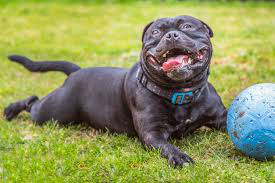

In [ ]:
img_url = 'https://raw.githubusercontent.com/qutang/jupyter_notebook_articles/main/images/dog.jpg'
response = requests.get(img_url)
img = pil.Image.open(BytesIO(response.content))

img_t = preprocess(img)
img

In [ ]:
# Transform it into input batches
batch_t = torch.unsqueeze(img_t, 0)
batch_t.size()

torch.Size([1, 3, 224, 224])